In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score

url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"

data = pd.read_csv(url)

data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [3]:
data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [4]:
df = pd.DataFrame(data[['MedInc',
       'Latitude', 'Longitude']])

df

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25
...,...,...,...
20635,1.5603,39.48,-121.09
20636,2.5568,39.49,-121.21
20637,1.7000,39.43,-121.22
20638,1.8672,39.43,-121.32


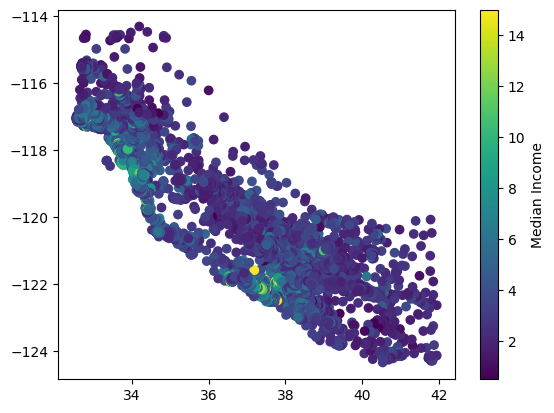

In [5]:
plt.scatter(df["Latitude"], df["Longitude"], c=df["MedInc"], cmap='viridis')
plt.colorbar(label='Median Income')

In [6]:
x = df[['Latitude','Longitude']]

y = df['MedInc']



In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)


KNeighborsRegressor()

In [9]:
y_pred = knn_regressor.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 1.6011731455534883
R^2 Score: 0.5507202418859085


In [10]:
import pandas as pd
import numpy as np

if isinstance(X_test, np.ndarray):
    X_test = pd.DataFrame(X_test, columns=['Latitude', 'Longitude'])

# Assuming y_pred is a numpy array or a pandas Series and X_test is a DataFrame
results = pd.DataFrame({
    'Latitude': X_test['Latitude'],
    'Longitude': X_test['Longitude'],
    'Predicted': y_pred
})

results

,Latitude,Longitude,Predicted
0,0.191664,0.286641,2.45136
1,-0.239115,0.061963,2.92882
2,1.006397,-1.425909,5.13040
3,-0.641799,0.431434,5.53254
4,0.453877,-1.171273,3.16400
...,...,...,...
6187,0.800373,-1.156295,2.41210
6188,-0.721399,1.130434,2.13306
6189,-0.927424,0.835856,4.91300
6190,1.015762,-0.846738,3.26222


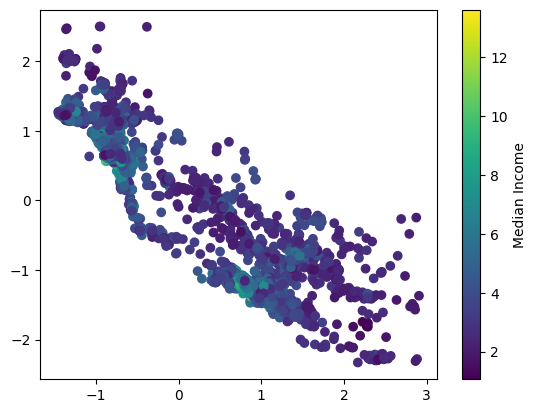

In [11]:
plt.scatter(results['Latitude'], results['Longitude'], c=results['Predicted'], cmap='viridis')
plt.colorbar(label='Median Income')